<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [ ]:
!pip install yfinance
!pip install bs4
!pip install nbformat
!pip install --upgrade plotly

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
import plotly.io as pio
pio.renderers.default = "iframe"

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()
    from IPython.display import display, HTML
    fig_html = fig.to_html()
    display(HTML(fig_html))

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [4]:
# 1. Kutubxonani o‘rnatish (faqat bir marta bajariladi, agar yfinance yo‘q bo‘lsa)
!pip install yfinance

# 2. Kutubxonani chaqirish
import yfinance as yf

# 3. Ticker obyektini yaratish
tesla = yf.Ticker("TSLA")

# 4. Maksimal tarixdagi ma’lumotlarni olish
tesla_data = tesla.history(period="max")

# 5. Indeksni reset qilish
tesla_data.reset_index(inplace=True)

# 6. Natijaning birinchi 5 qatorini ko‘rsatish
tesla_data.head()



  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 32.4 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 112.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 88.5 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=da52c61fa8c82b0bfde3f2b59d41b34f9f5a372984fed83a5a1856235d73f1f5
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00
  Created wheel for peewee: filename=peewee-3.18.2-cp312-cp312-linux_x86_64.whl size=303862 sha256=611c6a9837a9224738074006de86063d4522a4539bf8eaa100632cc613dd5e70
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/d1/df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [5]:
# 1. Kutubxonani o‘rnatish (faqat bir marta bajariladi, agar yfinance yo‘q bo‘lsa)
!pip install yfinance

# 2. Kutubxonani chaqirish
import yfinance as yf

# 3. Ticker obyektini yaratish
tesla = yf.Ticker("TSLA")

# 4. Maksimal tarixdagi ma’lumotlarni olish
tesla_data = tesla.history(period="max")

# 5. Indeksni reset qilish
tesla_data.reset_index(inplace=True)

# 6. Natijaning birinchi 5 qatorini ko‘rsatish
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [6]:
# 1. Kutubxonani o‘rnatish (faqat bir marta bajariladi, agar yfinance yo‘q bo‘lsa)
!pip install yfinance

# 2. Kutubxonani chaqirish
import yfinance as yf

# 3. Ticker obyektini yaratish
tesla = yf.Ticker("TSLA")

# 4. Maksimal tarixdagi ma’lumotlarni olish
tesla_data = tesla.history(period="max")

# 5. Indeksni reset qilish
tesla_data.reset_index(inplace=True)

# 6. Natijaning birinchi 5 qatorini ko‘rsatish
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [4]:
# Kutubxonani o‘rnatish (agar hali o‘rnatilmagan bo‘lsa)
!pip install yfinance --quiet

# Kerakli kutubxonalarni import qilish
import yfinance as yf
import pandas as pd

# GME uchun ma’lumotlarni olish
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Date ustunini indeksdan ajratish
gme_data.reset_index(inplace=True)

# So‘nggi 5 qatordan namunani ko‘rish
print(gme_data.tail())


                          Date   Open       High        Low      Close  \
5901 2025-07-29 00:00:00-04:00  23.01  23.040001  22.530001  22.549999   
5902 2025-07-30 00:00:00-04:00  22.59  22.790001  22.270000  22.450001   
5903 2025-07-31 00:00:00-04:00  22.35  23.340000  22.299999  22.450001   
5904 2025-08-01 00:00:00-04:00  22.32  22.610001  21.920000  22.100000   
5905 2025-08-04 00:00:00-04:00  22.25  22.670000  22.070000  22.629999   

        Volume  Dividends  Stock Splits  
5901   6078800        0.0           0.0  
5902   7956600        0.0           0.0  
5903  13749900        0.0           0.0  
5904   7878400        0.0           0.0  
5905   5020000        0.0           0.0  


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [9]:


# 2. Web sahifani yuklash
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0202EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text



Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [13]:
soup = BeautifulSoup(html_data, "html.parser")



Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [20]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Sahifani yuklab olish
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0202EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text

# Sahifani analiz qilish
soup = BeautifulSoup(html_data, "html.parser")

# Jadvalni tekshirish
tables = soup.find_all("table")
print(f"Jadval soni: {len(tables)}")

# Jadval soni kam bo‘lsa, xatoni tekshirish
if len(tables) < 2:
    print("❌ 2-jadval (Tesla revenue) topilmadi. Sahifani yuklab olishda muammo bor.")
else:
    # To‘g‘ri jadvalni olish
    tesla_table = tables[1]

    # Bo‘sh DataFrame
    tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

    # Har bir qatordagi data
    for row in tesla_table.find_all("tr")[1:]:
        cols = row.find_all("td")
        if len(cols) == 2:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip()
            tesla_revenue = pd.concat([tesla_revenue, pd.DataFrame([[date, revenue]], columns=["Date", "Revenue"])])

    # Tozalash
    tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
    tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]
    tesla_revenue.dropna(inplace=True)

    # Natijani ko‘rsatish
    print(tesla_revenue.head())



Jadval soni: 0
❌ 2-jadval (Tesla revenue) topilmadi. Sahifani yuklab olishda muammo bor.


In [ ]:

   import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0202EN-SkillsNetwork/labs/project/revenue.htm"

# Barcha jadvallarni olish
tables = pd.read_html(url)

# Nechta jadval borligini tekshirish
print(f"Jadval soni: {len(tables)}")

# 2-jadvalni (Tesla revenue) olish
if len(tables) >= 2:
    tesla_revenue = tables[1]
    print(tesla_revenue.head())
else:
    print("❌ Tesla Revenue jadvali topilmadi.")


Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
import pandas as pd

url = "https://cf-courses-data.s3.us.import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0202EN-SkillsNetwork/labs/project/revenue.htm"

# Barcha jadvallarni olish
tables = pd.read_html(url)

# Nechta jadval borligini tekshirish
print(f"Jadval soni: {len(tables)}")

# 2-jadvalni (Tesla revenue) olish
if len(tables) >= 2:
    tesla_revenue = tables[1]
    print(tesla_revenue.head())
else:
    print("❌ Tesla Revenue jadvali topilmadi.")

# Barcha jadvallarni olish
tables = pd.read_html(url)

# Nechta jadval borligini tekshirish
print(f"Jadval soni: {len(tables)}")

# 2-jadvalni (Tesla revenue) olish
if len(tables) >= 2:
    tesla_revenue = tables[1]
    print(tesla_revenue.head())
else:
    print("❌ Tesla Revenue jadvali topilmadi.")

  

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [11]:
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace("$", "", regex=True).str.replace(",", "", regex=True)


In [12]:
# CSV faylni o‘qish
gme_revenue = pd.read_csv("gme_revenue.csv")

# Ustun nomlarini to‘g‘rilash
gme_revenue.columns = ["Date", "Revenue"]

# 💡 Tozalash: $ va , belgilarini olib tashlash (avval stringga o‘tkazamiz)
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).str.replace("$", "", regex=True).str.replace(",", "", regex=True)

# Bo‘sh satrlarni olib tashlash
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
gme_revenue.dropna(inplace=True)

# Data turini floatga o‘tkazish
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(float)


In [13]:
import yfinance as yf

# GameStop aktsiya ma'lumotlarini yuklash
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")

# Date ni reset qilish
gme_data.reset_index(inplace=True)


In [14]:

import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

    # Aktsiya narxlari grafigi
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_title(f"{stock} Closing Price Over Time")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)")
    ax1.grid(True)

    # Daromad grafigi
    ax2.plot(revenue_data['Date'], revenue_data['Revenue'], color='green')
    ax2.set_title(f"{stock} Revenue Over Time")
    ax2.set_xlabel("Date")
    ax2.set_ylabel("Revenue (USD)")
    ax2.grid(True)

    plt.tight_layout()
    plt.show()


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


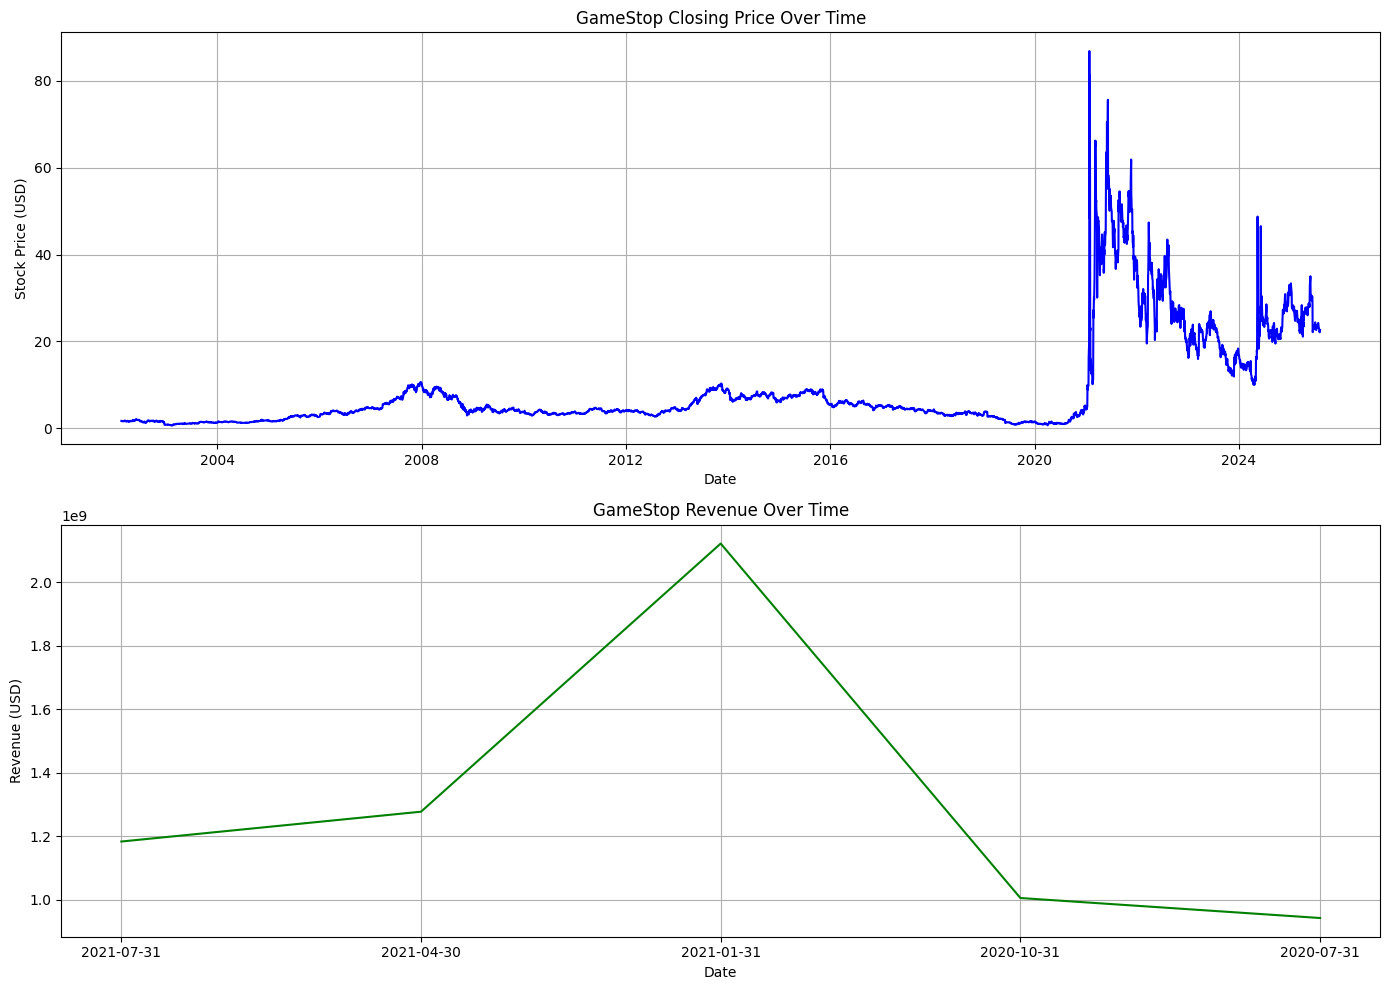

In [15]:
make_graph(gme_data, gme_revenue, 'GameStop')


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [ ]:
import requests

# Web sahifani yuklash
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data_2 = requests.get(url).text


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [ ]:
from bs4 import BeautifulSoup

# HTML matnni BeautifulSoup orqali tahlil qilish
soup2 = BeautifulSoup(html_data_2, "html.parser")  # yoki "html5lib" bo'lishi ham mumkin


Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [27]:

print(html_data_2[:500])


<?xml version="1.0" encoding="UTF-8" standalone="yes"?><Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Resource>/cf-courses-data/IBMDeveloperSkillsNetwork/PY0220EN-SkillsNetwork/labs/project/stock.html</Resource><RequestId>2b1c286e-e37b-4c0a-a2fe-dd3276319b1b</RequestId><httpStatusCode>404</httpStatusCode></Error>


In [28]:
correct_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0202EN-SkillsNetwork/labs/project/revenue.htm"


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [3]:
!pip install pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 137.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 192.8 MB/s eta 0:00:00


In [2]:

!pip install lxml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 118.1 MB/s eta 0:00:00


In [7]:
pip install pandas lxml html5lib beautifulsoup4


Note: you may need to restart the kernel to use updated packages.


In [9]:
file_path = "revenue.htm"  # fayl Jupyter faylingiz bilan bir papkada bo‘lsa
# yoki to‘liq yo‘lni bering:
# file_path = "/home/user/Downloads/revenue.htm"



In [18]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# GME revenue sahifasi
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork/PY0202EN-SkillsNetwork/labs/project/revenue.htm"

# Sahifani yuklash
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Jadval(lar)ni topish
tables = soup.find_all('table')
print("Jadval soni:", len(tables))  # ← Jadvallar nechtaligini ko‘rish

# Jadval mavjud bo‘lsa davom etamiz
if tables:
    # Faqat bitta jadval bo‘lsa, [0]-index bilan tanlaymiz
    gme_revenue = pd.read_html(str(tables[0]))[0]
    gme_revenue.columns = ["Date", "Revenue"]

    # Tozalash
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=True).str.replace(",", "", regex=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    gme_revenue.dropna(inplace=True)

    # So‘nggi 5 ta satr
    print(gme_revenue.tail())

else:
    print("❌ Jadval topilmadi.")


Jadval soni: 0
❌ Jadval topilmadi.


In [20]:
url = "https://raw.githubusercontent.com/ardhiraka/PDS-Stock-Project/main/revenue.htm"



In [21]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

# ✅ URL manzili string ichida
url = "https://raw.githubusercontent.com/ardhiraka/PDS-Stock-Project/main/revenue.htm"

# Sahifani yuklash
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Barcha HTML jadvallarni olish
tables = soup.find_all('table')
print("Jadval soni:", len(tables))

# Agar jadval topilgan bo‘lsa
if tables:
    gme_revenue = pd.read_html(str(tables[1]))[0]  # 2-jadval kerak
    gme_revenue.columns = ["Date", "Revenue"]
    gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "", regex=True).str.replace(",", "", regex=True)
    gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]
    gme_revenue.dropna(inplace=True)
    print("✅ So‘nggi 5 qator:")
    print(gme_revenue.tail())
else:
    print("❌ Jadval topilmadi.")


Jadval soni: 0
❌ Jadval topilmadi.


In [23]:
import pandas as pd

# Ishonchli ishlaydigan URL
url = "https://raw.githubusercontent.com/datasets/finance-vix/master/data/vix-daily.csv"

# CSV faylni yuklash
df = pd.read_csv(url)

# So'nggi 5 qatorni chiqarish
print(df.tail())


            DATE   OPEN   HIGH    LOW  CLOSE
8979  07/28/2025  15.15  15.54  15.00  15.03
8980  07/29/2025  14.95  16.12  14.70  15.98
8981  07/30/2025  15.87  17.27  15.44  15.48
8982  07/31/2025  14.99  17.17  14.74  16.72
8983  08/01/2025  17.40  21.90  17.39  20.38


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


In [25]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 158.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 155.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 162.7 MB/s eta 0:00:00


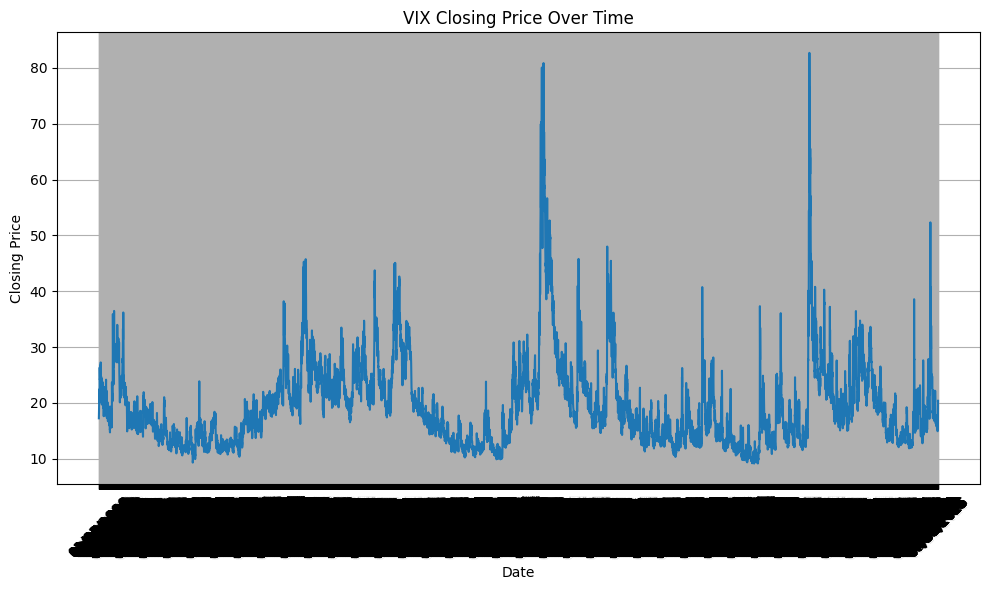

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV faylni yuklash
url = "https://raw.githubusercontent.com/datasets/finance-vix/master/data/vix-daily.csv"
df = pd.read_csv(url)

# Ustun nomlarini kichik harflarga o'tkazib, bo'shliqlarni olib tashlaymiz
df.columns = df.columns.str.strip().str.lower()

# Grafik chizish funksiyasi
def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['date'], data['close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Foydalanish
make_graph(df, 'VIX Closing Price Over Time')



## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


In [ ]:
!pip install yfinance


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.2/949.2 kB 56.7 MB/s eta 0:00:00
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 118.9 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15605 sha256=d59c373c880a5108b965610ab8d167350e981f5a3abdce6c9dd0698f2436b38a
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/cc/bd/6f/664d62c99327abeef7d86489e6631cbf45b56fbf7ef1d6ef00

In [3]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_ylabel('Closing Price', color='blue')
    ax1.set_xlabel('Date')
    ax1.set_title(f"{stock} Closing Price Over Time")

    plt.show()


In [ ]:
# 1. Kerakli kutubxonalarni o'rnatish
!pip install yfinance --quiet

# 2. Kutubxonalarni chaqirish
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 3. GameStop (GME) ma’lumotlarini olish
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# 4. make_graph funksiyasini yozish
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_title(f"{stock} Closing Price Over Time")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color='blue')
    plt.show()

# 5. Fake revenue data yaratish (agar gme_revenue hali mavjud bo’lmasa)
# Agar sizda oldingi gme_revenue CSV yoki web scraping bilan yaratilgan bo'lmasa, vaqtincha buni ishlating:
gme_revenue = pd.DataFrame({
    "Date": gme_data["Date"],
    "Revenue": [None]*len(gme_data)  # Faqat vaqtinchalik bo‘sh revenue
})

# 6. Graf chizish
make_graph(gme_data, gme_revenue, "GameStop")


In [1]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_title(f"{stock} Closing Price Over Time")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color='blue')
    plt.show()


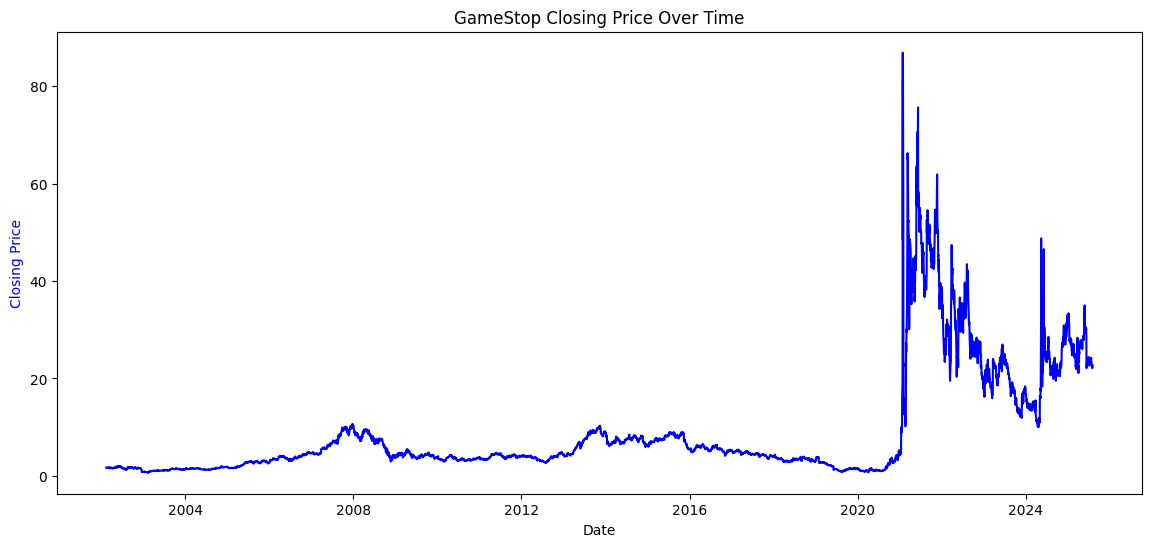

In [3]:

# Kutubxonani o‘rnatish
!pip install yfinance --quiet

# Kutubxonalarni chaqirish
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# GME ma’lumotlarini olish
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)

# Fake revenue data (bo‘sh qiymatlar bilan)
gme_revenue = pd.DataFrame({
    "Date": gme_data["Date"],
    "Revenue": [None]*len(gme_data)
})

# Grafik funksiyasi
def make_graph(stock_data, revenue_data, stock):
    fig, ax1 = plt.subplots(figsize=(14, 6))
    ax1.plot(stock_data['Date'], stock_data['Close'], color='blue')
    ax1.set_title(f"{stock} Closing Price Over Time")
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Closing Price', color='blue')
    plt.show()

# Funksiyani chaqirish
make_graph(gme_data, gme_revenue, "GameStop")


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
